In [27]:
    import os
    os.getcwd()

'/home/jovyan'

In [28]:
try:
    from collections import OrderedDict
except ImportError:
    from ordereddict import OrderedDict
    
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
Cleanreview_df = pd.read_csv('musicreviews_clean.csv' )


In [29]:
Cleanreview_df.head()

,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,Full_Review_str,tokenized,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"good Not much to write about here, but it does...","['good', 'Not', 'much', 'to', 'write', 'about'...","['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,Jake The product does exactly as it should and...,"['Jake', 'The', 'product', 'does', 'exactly', ...","['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,It Does The Job Well The primary job of this d...,"['It', 'Does', 'The', 'Job', 'Well', 'The', 'p...","['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,"['GOOD', 'WINDSCREEN', 'FOR', 'THE', 'MONEY', ...","['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,No more pops when I record my vocals. This pop...,"['No', 'more', 'pops', 'when', 'I', 'record', ...","['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...


In [30]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9093 non-null   int64  
 1   reviewerID         9093 non-null   object 
 2   asin               9093 non-null   object 
 3   helpful            9093 non-null   object 
 4   overall            9093 non-null   int64  
 5   unixReviewTime     9093 non-null   int64  
 6   title              9093 non-null   object 
 7   price              9093 non-null   float64
 8   imUrl              9093 non-null   object 
 9   categories         9093 non-null   object 
 10  brand              9093 non-null   object 
 11  Full Review        9093 non-null   object 
 12  Rating             9093 non-null   object 
 13  time               9093 non-null   object 
 14  contracted         9093 non-null   object 
 15  Full_Review_str    9093 non-null   object 
 16  tokenized          9093 

In [31]:
#df['date'].dt.year
Cleanreview_df['ReviewDate'] = pd.to_datetime(Cleanreview_df['time'])

Cleanreview_df['ReviewYear'] = Cleanreview_df['ReviewDate'].dt.year
Cleanreview_df.head()


,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,ReviewDate,ReviewYear
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...,2014-02-28,2014
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...,2013-03-16,2013
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...,2013-08-28,2013
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...,2014-02-14,2014
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...,2014-02-21,2014


In [32]:
 classCounts=Cleanreview_df.groupby(['overall','ReviewYear']).size()
print(classCounts)




overall  ReviewYear
1        2006             1
         2009             2
         2010             7
         2011            12
         2012            39
         2013            66
         2014            63
2        2007             1
         2008             2
         2009             2
         2010             9
         2011            28
         2012            36
         2013            81
         2014            70
3        2008             7
         2009             7
         2010            18
         2011            66
         2012           112
         2013           295
         2014           188
4        2004             1
         2005             1
         2006             2
         2007             5
         2008            16
         2009            25
         2010            75
         2011           176
         2012           343
         2013           758
         2014           488
5        2004             5
         2005             3


In [33]:
rows=[3,4]
column=['Full_Review_str','lemma_str','Rating']
Cleanreview_df.loc[rows,column]

,Full_Review_str,lemma_str,Rating
3,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,good windscreen money nice windscreen protects...,good
4,No more pops when I record my vocals. This pop...,pop record vocal pop filter great look perform...,good


In [34]:
Balanced2014Review= pd.DataFrame({'ReviewerID':np.random.randn(1000), 'overall':np.random.randint(low = 1, high = 5, size=1000)})

Balanced2014Review.groupby(['overall']).size()
Balanced2014Review.head()

,ReviewerID,overall
0,-2.142860,2
1,0.844295,1
2,0.417840,3
3,0.073343,1
4,0.845326,3


In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         9093 non-null   int64         
 1   reviewerID         9093 non-null   object        
 2   asin               9093 non-null   object        
 3   helpful            9093 non-null   object        
 4   overall            9093 non-null   int64         
 5   unixReviewTime     9093 non-null   int64         
 6   title              9093 non-null   object        
 7   price              9093 non-null   float64       
 8   imUrl              9093 non-null   object        
 9   categories         9093 non-null   object        
 10  brand              9093 non-null   object        
 11  Full Review        9093 non-null   object        
 12  Rating             9093 non-null   object        
 13  time               9093 non-null   object        
 14  contract

In [38]:
Cleanreview_df.isnull().sum()

Cleanreview_df=Cleanreview_df.dropna(subset=['lemma_str'])

In [39]:
Cleanreview_df.isnull().sum()

Unnamed: 0           0
reviewerID           0
asin                 0
helpful              0
overall              0
unixReviewTime       0
title                0
price                0
imUrl                0
categories           0
brand                0
Full Review          0
Rating               0
time                 0
contracted           0
Full_Review_str      0
tokenized            0
lower                0
langs                0
no_punc              0
stopwords_removed    0
pos_tags             0
wordnet_pos          0
lemmatized           0
lemma_str            0
ReviewDate           0
ReviewYear           0
dtype: int64

In [40]:
contains_digit = any(map(str.isdigit, Cleanreview_df['Rating']))
print(contains_digit) 

False


In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [47]:

pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
#sampling with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# define the dataset location

X = Cleanreview_df['lemma_str']
y = Cleanreview_df['overall']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, y,train_size=6365,
                                                  test_size = 2728,
                                                  random_state=12)

'''
from imblearn.over_sampling import SMOTE 
sm = SMOTE(k_neighbors=1, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, df.labels) 
'''

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (/opt/conda/lib/python3.7/site-packages/sklearn/utils/fixes.py)

In [26]:
x_test_res, y_test_res = sm.fit_resample(x_val, y_val)

NameError: name 'sm' is not defined

In [34]:
#Verifying oversampling 
y_test_res.value_counts()
y_train_res.value_counts()

5    4252
4    4252
3    4252
2    4252
1    4252
Name: overall, dtype: int64

In [25]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


In [35]:
#Modelling
import itertools
# Confusion Matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [36]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test_res, predictions)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=[1,2,3,4,5], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [37]:
def modeling(Model, Xtrain = x_train_res, Xtest = x_test_res):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [38]:
#Function call for Logistic Regression

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train_res, y_train_res)

predictions = logisticRegr.predict(x_test_res)

In [39]:
score = logisticRegr.score(x_test_res, y_test_res)
#score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.3949972811310495


In [40]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.70      0.27      0.39      1839
           2       0.35      0.13      0.19      1839
           3       0.37      0.39      0.38      1839
           4       0.33      0.41      0.37      1839
           5       0.40      0.76      0.52      1839

    accuracy                           0.39      9195
   macro avg       0.43      0.39      0.37      9195
weighted avg       0.43      0.39      0.37      9195



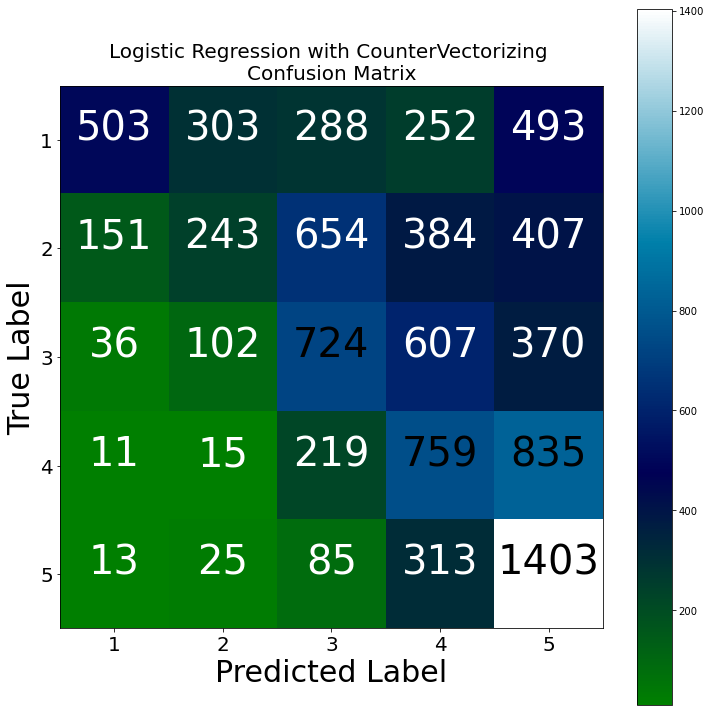

In [41]:
disp_confusion_matrix(predictions, "Logistic Regression")

In [42]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [43]:
#Modelling using Naive Bayes
# instantiate learning model alpha = optimal_alpha

from sklearn.naive_bayes import MultinomialNB
nb_optimal =  MultinomialNB(alpha = 1.0)

# fitting the model
nb_optimal.fit(x_train_res, y_train_res)

# predict the response

MultinomialNB()

In [44]:
predictions_nb = nb_optimal.predict(x_test_res)

In [45]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.63      0.32      0.42      1839
           2       0.19      0.10      0.13      1839
           3       0.30      0.41      0.34      1839
           4       0.32      0.47      0.38      1839
           5       0.52      0.57      0.54      1839

    accuracy                           0.37      9195
   macro avg       0.39      0.37      0.37      9195
weighted avg       0.39      0.37      0.37      9195



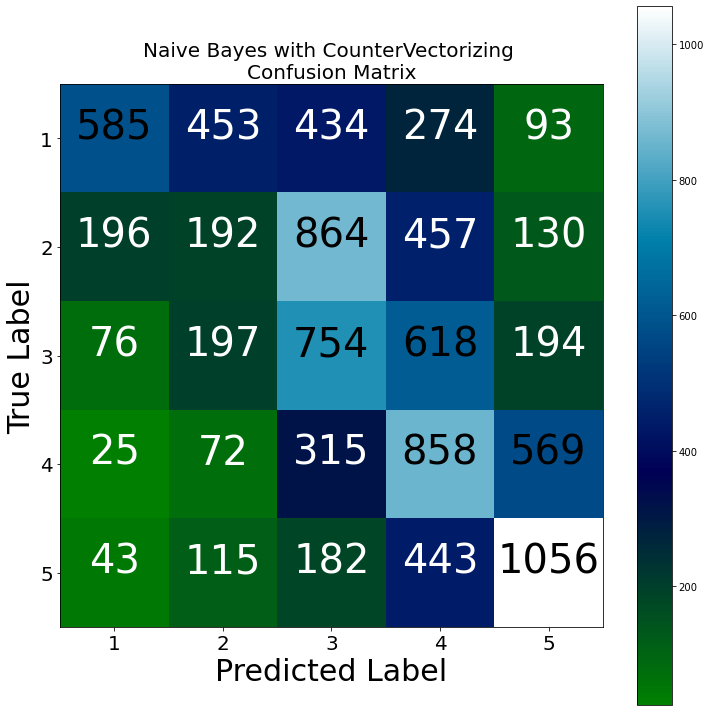

In [46]:
disp_confusion_matrix(predictions, "Naive Bayes")

In [47]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install tensorflow

     |████████████████████████████▌   | 351.6 MB 92.7 MB/s eta 0:00:01��███     | 333.4 MB 92.7 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 394.3 MB 7.2 kB/s 
     |████████████████████████████████| 14.8 MB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.5 MB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 56.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 62.4 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 58.5 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.8 MB/s  eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=70910 sha256=309aa7c032d8c2c1fdfc014b5952bfb8fcaaff7bd740887f3f0cac626ecbece8
  Stored in directory: /

In [49]:
pip install nltk

Processing ./.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266/nltk-3.5-py3-none-any.whl
  Using cached regex-2020.11.13-cp37-cp37m-manylinux2014_x86_64.whl (719 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install cufflinks

     |████████████████████████████████| 81 kB 4.0 MB/s eta 0:00:011
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67922 sha256=e008ad527ab2b02e93f1e81a9001b98fd6a746e4f74de6bab7d26cc9cdc99314
  Stored in directory: /home/jovyan/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [53]:
#LSTM modelling
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [55]:
# The maximum number of words to be used. (most frequent)

'''
X = Cleanreview_df['lemma_str']
y = Cleanreview_df['overall']
'''
MAX_NB_WORDS = 50000
# Max number of words in each Review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#, lower=True
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
                     )
tokenizer.fit_on_texts(Cleanreview_df['lemma_str'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

"\nX = Cleanreview_df['lemma_str']\ny = Cleanreview_df['overall']\n"

Found 17425 unique tokens.


In [56]:
X = tokenizer.texts_to_sequences(Cleanreview_df['lemma_str'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9093, 250)


In [57]:
Y = pd.get_dummies(Cleanreview_df['overall']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9093, 5)


In [58]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [59]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 2728, train_size=6365, random_state = 4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6365, 250) (6365, 5)
(2728, 250) (2728, 5)


In [60]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
x_test_res, y_test_res = sm.fit_resample(X_test, Y_test)

In [61]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
90/90 [==============================] - 48s 534ms/step - loss: 0.3450 - accuracy: 0.8710 - val_loss: 1.3117 - val_accuracy: 0.6389
Epoch 2/10
90/90 [==============================] - 48s 530ms/step - loss: 0.2824 - accuracy: 0.9024 - val_loss: 1.2673 - val_accuracy: 0.5918
Epoch 3/10
90/90 [==============================] - 48s 528ms/step - loss: 0.2232 - accuracy: 0.9223 - val_loss: 1.4925 - val_accuracy: 0.6248
Epoch 4/10
90/90 [==============================] - 48s 538ms/step - loss: 0.1782 - accuracy: 0.9392 - val_loss: 1.5893 - val_accuracy: 0.5856
Epoch 5/10
90/90 [==============================] - 47s 526ms/step - loss: 0.1370 - accuracy: 0.9579 - val_loss: 1.7593 - val_accuracy: 0.5934


In [65]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

86/86 [==============================] - 5s 60ms/step - loss: 1.5906 - accuracy: 0.6114
Test set
  Loss: 1.591
  Accuracy: 0.611


In [72]:
#binomial predictions flow
X_bin = Cleanreview_df['lemma_str']
y_bin = Cleanreview_df['Rating']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_bin = vec.fit_transform(X_bin)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train_bin, x_val_bin, y_train_bin, y_val_bin = train_test_split(X_bin, y_bin,train_size=6365,
                                                  test_size = 2728,
                                                  random_state=12)

'''
from imblearn.over_sampling import SMOTE 
sm = SMOTE(k_neighbors=1, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, df.labels) 
'''

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train_bin, y_train_bin)

'\nfrom imblearn.over_sampling import SMOTE \nsm = SMOTE(k_neighbors=1, random_state = 2) \nX_train_res, y_train_res = sm.fit_sample(X, df.labels) \n'

In [73]:
x_test_res, y_test_res = sm.fit_resample(x_val_bin, y_val_bin)

In [74]:
#Modelling using Naive Bayes
# instantiate learning model alpha = optimal_alpha

from sklearn.naive_bayes import MultinomialNB
nb_optimal =  MultinomialNB(alpha = 1.0)

# fitting the model
nb_optimal.fit(x_train_res, y_train_res)

# predict the response

MultinomialNB()

In [75]:
predictions = nb_optimal.predict(x_test_res)

In [76]:
score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.700755077446604


In [77]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

         bad       0.84      0.52      0.64      2598
        good       0.65      0.90      0.76      2598

    accuracy                           0.71      5196
   macro avg       0.75      0.71      0.70      5196
weighted avg       0.75      0.71      0.70      5196



In [78]:
def disp_confusion_matrix_bin(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test_res, predictions)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

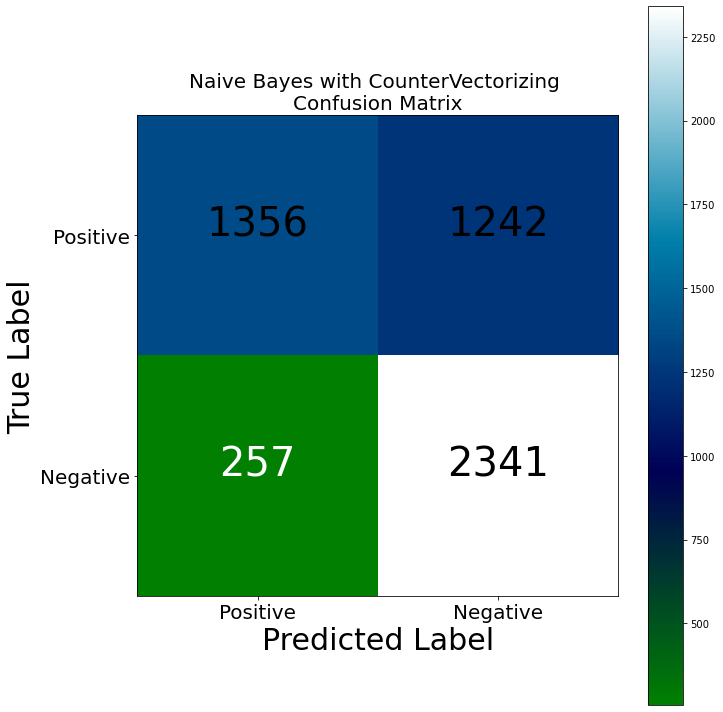

In [79]:
disp_confusion_matrix_bin(predictions, "Naive Bayes")

In [80]:
#Function call for Logistic Regression using binomial class

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train_res, y_train_res)

predictions = logisticRegr.predict(x_test_res)

LogisticRegression()

In [81]:
score = logisticRegr.score(x_test_res, y_test_res)
#score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.6926481909160893


In [82]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

         bad       0.91      0.43      0.58      2598
        good       0.63      0.96      0.76      2598

    accuracy                           0.69      5196
   macro avg       0.77      0.69      0.67      5196
weighted avg       0.77      0.69      0.67      5196



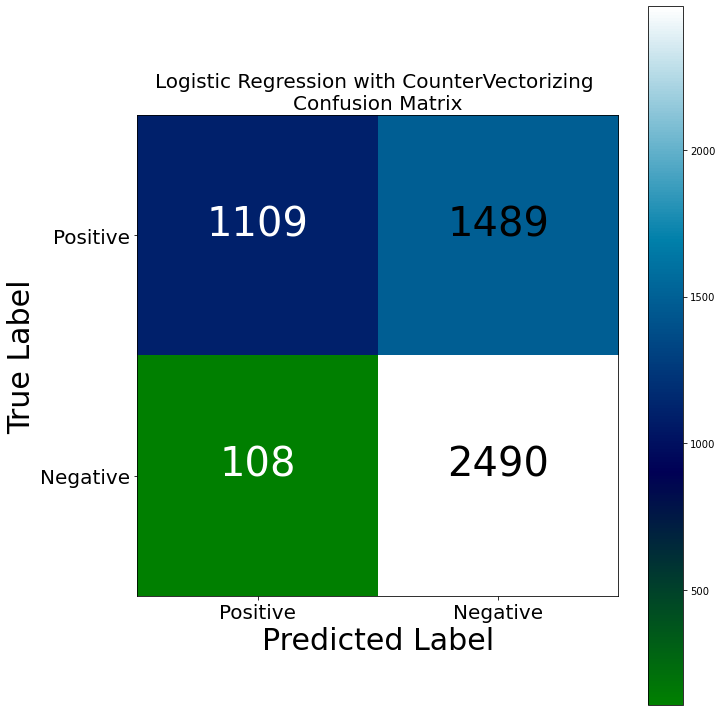

In [83]:
disp_confusion_matrix_bin(predictions, "Logistic Regression")

In [84]:
# The maximum number of words to be used. (most frequent)

'''
X = Cleanreview_df['lemma_str']
y = Cleanreview_df['Rating']
'''
MAX_NB_WORDS = 50000
# Max number of words in each Review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#, lower=True
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
                     )
tokenizer.fit_on_texts(Cleanreview_df['lemma_str'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

"\nX = Cleanreview_df['lemma_str']\ny = Cleanreview_df['Rating']\n"

Found 17425 unique tokens.


In [85]:
X = tokenizer.texts_to_sequences(Cleanreview_df['lemma_str'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9093, 250)


In [86]:
Y = pd.get_dummies(Cleanreview_df['overall']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9093, 5)


In [87]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [88]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 2728, train_size=6365, random_state = 4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6365, 250) (6365, 5)
(2728, 250) (2728, 5)


In [89]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
x_test_res, y_test_res = sm.fit_resample(X_test, Y_test)

In [90]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
90/90 [==============================] - 51s 538ms/step - loss: 1.1561 - accuracy: 0.6483 - val_loss: 0.9720 - val_accuracy: 0.6641
Epoch 2/5
90/90 [==============================] - 49s 540ms/step - loss: 0.9036 - accuracy: 0.6801 - val_loss: 0.9309 - val_accuracy: 0.6656
Epoch 3/5
90/90 [==============================] - 48s 533ms/step - loss: 0.7289 - accuracy: 0.7102 - val_loss: 0.9943 - val_accuracy: 0.6060
Epoch 4/5
90/90 [==============================] - 48s 531ms/step - loss: 0.5445 - accuracy: 0.7957 - val_loss: 1.0218 - val_accuracy: 0.6060
Epoch 5/5
90/90 [==============================] - 48s 533ms/step - loss: 0.4204 - accuracy: 0.8537 - val_loss: 1.1688 - val_accuracy: 0.6264


In [99]:
import sklearn

In [101]:
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(y_pred))

ValueError: multilabel-indicator is not supported

In [94]:
predictions = model.predict(X_test)
predictions

array([[1.8094972e-02, 3.6849532e-02, 1.9400084e-01, 5.8528900e-01,
        1.6576573e-01],
       [2.7324564e-05, 2.4970195e-05, 1.0247802e-04, 2.1044568e-03,
        9.9774075e-01],
       [1.8705688e-03, 5.6275888e-03, 3.5924785e-02, 7.2775733e-01,
        2.2881970e-01],
       ...,
       [1.9662458e-04, 2.6214123e-04, 9.8959845e-04, 3.1739365e-02,
        9.6681231e-01],
       [1.2661087e-04, 1.3853372e-04, 5.0973333e-04, 8.0929911e-03,
        9.9113208e-01],
       [2.4314155e-04, 4.5324216e-04, 1.9351698e-03, 4.5139667e-02,
        9.5222878e-01]], dtype=float32)

In [95]:
y_pred = (predictions > 0.5)

In [1]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

NameError: name 'y_test' is not defined

In [ ]:

comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])